In [1]:
# I suggest not running this again as it takes alot of time to compile
# Import Required Models

import cv2
import numpy as np
import mahotas as mt
import matplotlib.pyplot as plt

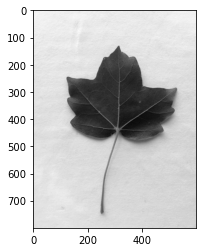

In [2]:
# This image will be used as a sample

img = cv2.imread('SamplePlant.jpg', 0)
plt.figure("'Gray Scale Image'")
plt.imshow(img, cmap="gray")

In [3]:
# This is the Preprocessing part

In [4]:
# Following Filters were used

def meanF(image):    # Mean filter
    im2 = cv2.blur(image, (3, 3))
    return im2


def gaussianF(image):   # Gaussian Filter
    im2 = cv2.GaussianBlur(image, (15, 15), 0)
    return im2


def medianF(image):     # Median Filter
    im2 = cv2.medianBlur(image, 15)
    return im2


def bilateralF(image):  # Bilateral Filter
    im2 = cv2.bilateralFilter(image, 9, 80, 80)
    return im2

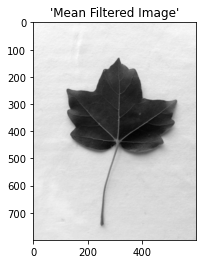

In [5]:
# Applying Mean Filter

img = cv2.imread('SamplePlant.jpg', 0)
img = meanF(img)
plt.title("'Mean Filtered Image'")
plt.imshow(img, cmap="gray")

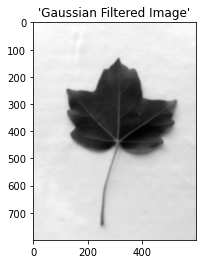

In [6]:
# Applying Gaussian Filter

img = cv2.imread('SamplePlant.jpg', 0)
img = gaussianF(img)
plt.title("'Gaussian Filtered Image'")
plt.imshow(img, cmap="gray")

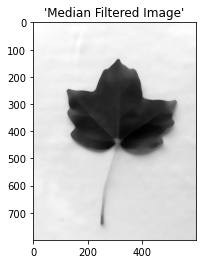

In [7]:
# Applying Median Filter

img = cv2.imread('SamplePlant.jpg', 0)
img = medianF(img)
plt.title("'Median Filtered Image'")
plt.imshow(img, cmap="gray")

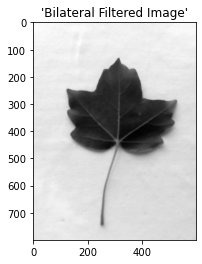

In [8]:
# Applying Bilateral Filter

img = cv2.imread('SamplePlant.jpg', 0)
img = bilateralF(img)
plt.title("'Bilateral Filtered Image'")
plt.imshow(img, cmap="gray")

In [9]:
# Stage 2 of Preprocessing - Image enhancement with Histogram Equalization

In [10]:
# Equalization techniques

def histogram_equalization(image):      # Normal Histogram Equalization Method
    filtered_image = meanF(image)       # Applying mean filter
    equ = cv2.equalizeHist(filtered_image)
    return equ

def clahe_equalization_Image(image):    # Adaptive Histogram Equalization
    filtered_image = meanF(image)       # Applying mean filter
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(20, 20))
    cl1 = clahe.apply(filtered_image)
    return cl1

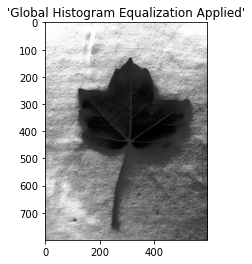

In [11]:
# Applying Global Histogram Equalization

img = cv2.imread('SamplePlant.jpg', 0)
img = histogram_equalization(img)
plt.title("'Global Histogram Equalization Applied'")
plt.imshow(img, cmap="gray")

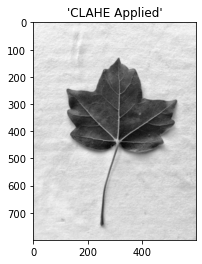

In [12]:
# Applying CLAHE

img = cv2.imread('SamplePlant.jpg', 0)
img = clahe_equalization_Image(img)
plt.title("'CLAHE Applied'")
plt.imshow(img, cmap="gray")

In [13]:
# This part deals with Image Segmentation

In [14]:
# Thresholding Techniques

def simple_thresholding(image):
    img = clahe_equalization_Image(image)
    mean = img.mean()
    ret3, thresh = cv2.threshold(img, mean/2, 255, cv2.THRESH_BINARY_INV)
    return thresh


def otsu_binary_thresholding(image):
    img = clahe_equalization_Image(image)
    mean = img.mean()
    ret3, thresh = cv2.threshold(img, mean/2, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    return thresh


def closing(image):
    img = otsu_binary_thresholding(image)
    kernel = np.ones((10, 10), np.uint8)
    closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    return closing

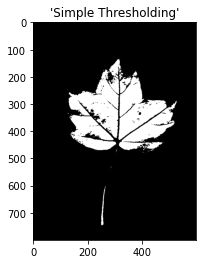

In [15]:
# Applying Simple Thresholding

img = cv2.imread('SamplePlant.jpg', 0)
img = simple_thresholding(img)
plt.title("'Simple Thresholding'")
plt.imshow(img, cmap="gray")

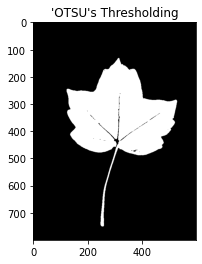

In [16]:
# Applying OTSU's Thresholding

img = cv2.imread('SamplePlant.jpg', 0)
img = otsu_binary_thresholding(img)
plt.title("'OTSU's Thresholding")
plt.imshow(img, cmap="gray")

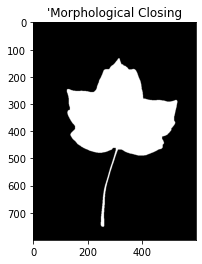

In [17]:
# Applying morphological Closing After Thresholding

img = cv2.imread('SamplePlant.jpg', 0)
img = closing(img)
plt.title("'Morphological Closing")
plt.imshow(img, cmap="gray")

In [18]:
# Edge Detection Techniques

def sobel_edge_detection(image):    # Using Sobel method
    processed_image = closing(image)
    sobelx = cv2.Sobel(processed_image, cv2.CV_64F, 1, 0, ksize=5)
    abs_sobelx = np.absolute(sobelx)
    sobel_unit = np.uint8(abs_sobelx)
    sobely = cv2.Sobel(processed_image, cv2.CV_64F, 0, 1, ksize=5)
    abs_sobely = np.absolute(sobely)
    sobel_unit = np.uint8(abs_sobely)
    return abs_sobelx

def canny_edge_detection(image):    # Using Canny Edge Detection
    processed_image = closing(image)
    edges = cv2.Canny(processed_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours, hierarchy = cv2.findContours(processed_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    final_image = cv2.drawContours(processed_image, contours, -1, (255, 255, 255), 10)
    return contours, edges

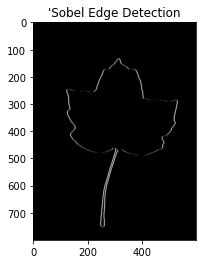

In [19]:
# Applying Sobel Edge Detection

img = cv2.imread('SamplePlant.jpg', 0)
img = sobel_edge_detection(img)
plt.title("'Sobel Edge Detection")
plt.imshow(img, cmap="gray")

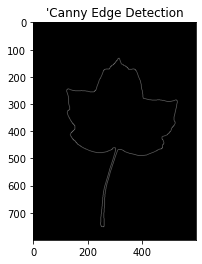

In [20]:
# Applying Canny Edge Detection

img = cv2.imread('SamplePlant.jpg', 0)
cnt, img = canny_edge_detection(img)
plt.title("'Canny Edge Detection")
plt.imshow(img, cmap="gray")

In [21]:
# Final Image used for training

In [22]:
# This produces the final image using all the best techniques mentioned above

def final_image(image):
    cnts, img = canny_edge_detection(image)
    contour = cnts[0]
    finImage = cv2.drawContours(meanF(image), contour, -1, (0, 0, 0), 10)
    return finImage, contour

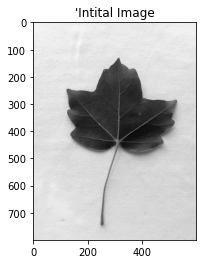

In [23]:
# Displaying the intial Image

img = cv2.imread('SamplePlant.jpg', 0)
plt.title("'Intital Image")
plt.imshow(img, cmap="gray")

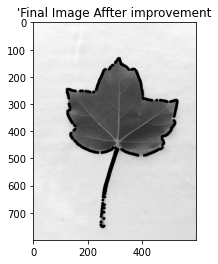

In [24]:
# Displaying the final Image

img = cv2.imread('SamplePlant.jpg', 0)
img, cnt = final_image(img)
plt.title("'Final Image Affter improvement")
plt.imshow(img, cmap="gray")

In [25]:
# The Haralick and Hu moments methods are applied on a picture to extract features

def hu_moments(image):    # Hu's 7 Moments Approach
    img, cnts = final_image(image)
    M = cv2.HuMoments(cv2.moments(image)).flatten()
    return M

def haralick_moments(image):    # Haralick Moments
    img, cnts = final_image(image)
    textures = mt.features.haralick(img)
    ht_mean = textures.mean(axis=0)
    return ht_mean

In [26]:
# Extracting hu Moment features

img = cv2.imread('SamplePlant.jpg', 0)
img, contour = final_image(img)
hu_moments(img)

array([ 1.03580350e-03,  9.41800088e-08,  2.44792330e-13,  1.53393716e-12,
        7.06945559e-25,  2.63040531e-16, -6.19480733e-25])

In [27]:
# Extracting haralick features

img = cv2.imread('SamplePlant.jpg', 0)
img, contour = final_image(img)
haralick_moments(img)

array([ 9.40604054e-03,  1.82193105e+02,  9.82885317e-01,  5.32224149e+03,
        6.71763058e-01,  3.72194140e+02,  2.11067728e+04,  6.81330662e+00,
        7.95539660e+00,  1.52881936e-03,  1.77347546e+00, -6.39525978e-01,
        9.99686497e-01])

In [28]:
# These 2 methods are applied to all images in order to extract features.
# The dataset.py file then uses these techniques and applies them on all images in the leafsnap dataset.
# This dataset is converted into a csv file and used for training.

In [29]:
# Now we build the model

In [30]:
# Required Models
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [31]:
# Reading our dataset that has features computed from Hu Moments and Haralick features

data = pd.read_csv(r'C:\Users\Shrivi\COMP702 Project\prepared_dataset.csv')

In [32]:
# Shows the number of Rows and columns in the dataset

data.shape

(3705, 21)

In [33]:
# Shows the first and last 10 datae of the dataset

data.head(-10)

,Speceis,hu1,hu2,hu3,hu4,hu5,hu6,hu7,haralick1,haralick2,...,haralick4,haralick5,haralick6,haralick7,haralick8,haralick9,haralick10,haralick11,haralick12,haralick13
0,0,0.001103,0.001103,0.001103,0.001103,0.001103,0.001103,0.001103,0.004835,40.889272,...,1137.702877,0.702064,316.205822,4509.922237,7.393572,8.310205,0.001940,1.434402,-0.702190,0.999933
1,0,0.001174,0.001174,0.001174,0.001174,0.001174,0.001174,0.001174,0.004738,44.466198,...,1587.198431,0.746808,294.551943,6304.327525,7.659058,8.406404,0.002112,1.332963,-0.742207,0.999974
2,0,0.001729,0.001729,0.001729,0.001729,0.001729,0.001729,0.001729,0.010656,19.978653,...,683.221279,0.724257,191.804907,2712.906462,6.623855,7.456408,0.003341,1.377071,-0.680193,0.999755
3,0,0.001715,0.001715,0.001715,0.001715,0.001715,0.001715,0.001715,0.007213,9.793571,...,343.445726,0.689792,194.104654,1363.989333,6.673301,7.666136,0.003205,1.456554,-0.651922,0.999675
4,0,0.001731,0.001731,0.001731,0.001731,0.001731,0.001731,0.001731,0.006750,20.129842,...,719.399055,0.636990,188.635490,2857.466378,6.850271,8.060818,0.002836,1.671531,-0.626404,0.999654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3690,183,0.001666,0.001666,0.001666,0.001666,0.001666,0.001666,0.001666,0.004322,48.387498,...,3301.661906,0.608455,241.245008,13158.260124,7.474854,8.842388,0.001706,1.825101,-0.637636,0.999861
3691,183,0.001645,0.001645,0.001645,0.001645,0.001645,0.001645,0.001645,0.004715,69.911235,...,4900.115914,0.575340,250.860677,19530.552420,7.255643,8.779105,0.001462,1.990940,-0.600142,0.999704
3692,183,0.001662,0.001662,0.001662,0.001662,0.001662,0.001662,0.001662,0.003699,60.772680,...,4197.578781,0.554750,246.639261,16729.542442,7.544702,9.175479,0.001453,2.071160,-0.602298,0.999799
3693,183,0.001603,0.001603,0.001603,0.001603,0.001603,0.001603,0.001603,0.003378,65.057036,...,5101.501690,0.566150,251.915405,20340.949726,7.842138,9.406495,0.001368,2.011750,-0.629306,0.999903


In [34]:
# Now we set our labels as 'y' and the corresponding features to 'x'

y = data['Speceis']
X = data[['hu1', 'hu2', 'hu3', 'hu4', 'hu5', 'hu6', 'hu7', 'haralick1','haralick2','haralick3','haralick4','haralick5','haralick6','haralick7','haralick8','haralick9','haralick10','haralick11','haralick12','haralick13']]

In [35]:
# Now we can split the data into training(80%) and testing(20%) set.
# Note the data is shuffled by default (i.e. default: shuffle=True)
# Note we don't shuffle the data again as its has been done already and ensures both models are trained/tested in same way

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

In [36]:
# The differernt classifiers we use are KNN and RBC

model = RandomForestClassifier(n_estimators=100) # To use the KNN replace 'RandomForestClassifier(n_estimators=100)' with KNeighborsClassifier(n_neighbors=10)

In [37]:
# Training the model

model.fit(X_train, y_train)

RandomForestClassifier()

In [38]:
# Testing the model

y_pred = model.predict(X_test)

In [39]:
# Getting the score of the model. 
# Note this model does bad as this is only 20% of the dataset since its too big to upload

score = metrics.accuracy_score(y_test,y_pred)*200

In [40]:
# Displaying the score of the RFC Classifier

print("RFC Score: ", score)

RFC Score:  75.84345479082322


In [41]:
# In oder to use this model on a given image

# load the leaf image
img = cv2.imread('SamplePlant.jpg', 0)

# Extracting features from leaf
hu_moment_of_input_image = hu_moments(img)
haralick_of_input_image = haralick_moments(img)

# merge both lists
feature_vector = np.append(hu_moment_of_input_image, haralick_of_input_image)

print(feature_vector)

[ 9.90195362e-04  8.60845466e-08  1.13186549e-13  1.31837116e-12
  4.18926731e-25  2.48703708e-16 -2.89591650e-25  6.16802403e-03
  1.79025322e+02  9.80310096e-01  4.54569886e+03  5.79011844e-01
  3.81557419e+02  1.80037701e+04  6.90647470e+00  8.45269003e+00
  1.24755982e-03  2.04588541e+00 -5.74551531e-01  9.99376650e-01]


In [42]:
# This then predicts which class the plant is from

choice = model.predict_proba([feature_vector])

In [43]:
# The above then shows the probabilities that that the given image is in one of the classes.
# The class with the heighest probability is what the model predicts as the class of the image

print(choice[0])
choice = choice[0].flatten()

[0.   0.02 0.02 0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.01 0.   0.01 0.   0.   0.01 0.   0.   0.   0.
 0.01 0.   0.   0.   0.   0.   0.   0.02 0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.02 0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.11 0.01 0.02 0.   0.01 0.   0.   0.
 0.   0.   0.   0.02 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.05 0.   0.   0.   0.   0.03 0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.05 0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.16 0.   0.03 0.   0.   0.   0.
 0.   0.   0.11 0.   0.05 0.   0.   0.   0.   0.   0.   0.   0.08 0.
 0.   0.   0.02 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.1  0.
 0.   0.  ]


In [44]:
plant_class_id = 0
max = -10.00

# Finds the class for the given picture
for i in range(len(choice)):
    if choice[i] > max:
        plant_class_id = i
        max = choice[i]

print(f'This Plant belongs to Species Class {plant_class_id} based on a probability of {max*100}%')

This Plant belongs to Species Class 147 based on a probability of 16.0%
